<a href="https://colab.research.google.com/github/andreregino/network-science-notebooks/blob/main/ClassNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing the used libs
import random
import networkx as netx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from networkx.algorithms import bipartite

In [2]:
# calculating the average degree
def calculate_average_degree(G):
  number_of_nodes = len(G.nodes) # fixed number of degrees of the graph
  degree_of_network = G.degree()
  degrees = dict(degree_of_network).values()
  average_degree = sum(degrees) / number_of_nodes
  return average_degree

In [3]:
# calculating the degree distribution
def calculate_degree_distribution(G):
  degree_of_network = G.degree()
  degrees = dict(degree_of_network).values()
  plt.hist(dict(degree_of_network).values(), density=True)
  plt.show()
  return degrees

In [4]:
# reading the graph file
graph = pd.read_csv("class-network.tsv", sep = '\t')

# understanding the data
print(graph.head())

  Unnamed: 0  H1  H2  H3  H4  H5  H6  H7  H8  H9  H10  H11  H12
0         P1   0   1   0   0   0   1   0   0   0    0    0    0
1         P2   1   0   0   0   0   0   1   1   0    0    1    0
2         P3   1   0   1   0   0   0   1   0   0    0    0    0
3         P4   0   1   0   0   0   0   1   1   0    0    0    0
4         P5   0   0   0   1   0   0   1   1   0    0    0    1


## Network 1: Bipartite network

In [5]:
# transform the pandas frame to networkx bipartite graph
bipartite_network = netx.Graph()
bipartite_network.add_nodes_from(graph['Unnamed: 0'], bipartite=0)
bipartite_network.add_nodes_from(graph.columns, bipartite=1)
bipartite_network.remove_node('Unnamed: 0')

In [6]:
# mapping edges from bipartite graph
bipartite_network.remove_edges_from(bipartite_network.edges())
for person, row in graph[:][:].iterrows():
  h = 0
  for hobby in row:
    if hobby != 'P'+str(person+1):
      h+=1
      if hobby == 1:
        bipartite_network.add_edge('P'+str(person+1), "H"+(str(h)))

### Knowing the Data

In [7]:
print("Number of nodes:", len(bipartite_network.nodes))
print("Nodes", bipartite_network.nodes)
print("Number of edges:", len(bipartite_network.edges))
print("Edges:", bipartite_network.edges)

Number of nodes: 30
Nodes ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'H10', 'H11', 'H12']
Number of edges: 56
Edges: [('P1', 'H2'), ('P1', 'H6'), ('P2', 'H1'), ('P2', 'H7'), ('P2', 'H8'), ('P2', 'H11'), ('P3', 'H1'), ('P3', 'H3'), ('P3', 'H7'), ('P4', 'H2'), ('P4', 'H7'), ('P4', 'H8'), ('P5', 'H4'), ('P5', 'H7'), ('P5', 'H8'), ('P5', 'H12'), ('P6', 'H10'), ('P7', 'H2'), ('P7', 'H5'), ('P7', 'H10'), ('P8', 'H2'), ('P8', 'H7'), ('P8', 'H9'), ('P8', 'H10'), ('P8', 'H11'), ('P9', 'H5'), ('P9', 'H7'), ('P9', 'H8'), ('P10', 'H8'), ('P10', 'H10'), ('P10', 'H12'), ('P11', 'H5'), ('P11', 'H12'), ('P12', 'H6'), ('P12', 'H7'), ('P12', 'H12'), ('P13', 'H3'), ('P13', 'H7'), ('P13', 'H8'), ('P13', 'H12'), ('P14', 'H5'), ('P14', 'H6'), ('P14', 'H8'), ('P14', 'H12'), ('P15', 'H5'), ('P15', 'H7'), ('P15', 'H8'), ('P16', 'H1'), ('P16', 'H7'), ('P16', 'H12'), ('P17', 'H4'), ('P

### Average Degree and Degree Distribution

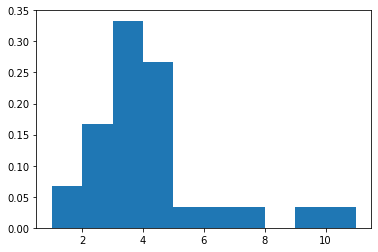

Degrees: dict_values([2, 4, 3, 3, 4, 1, 3, 5, 3, 3, 2, 3, 4, 4, 3, 3, 3, 3, 4, 4, 2, 2, 6, 4, 11, 9, 1, 4, 2, 7])
Average degree: 3.7333333333333334


In [8]:
# colocar titulo no gráfico
print("Degrees:", calculate_degree_distribution(bipartite_network))
print("Average degree:", calculate_average_degree(bipartite_network))

#### Degree Distribution - Gephi

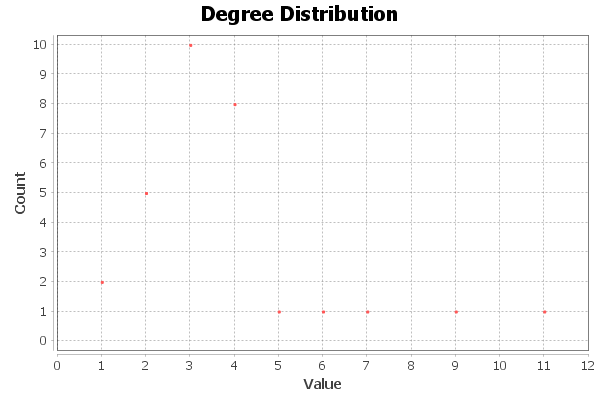

### Connected Components

In [9]:
# finding connected components
connected_components_bipartite = sorted(netx.connected_components(bipartite_network), key=len, reverse=True)
print("Number of connected components:", len(list(connected_components_bipartite)))
print("Connected components:",connected_components_bipartite)

Number of connected components: 1
Connected components: [{'P15', 'H10', 'H6', 'P2', 'H7', 'P5', 'P7', 'H5', 'P13', 'P10', 'H2', 'P17', 'P3', 'P12', 'P1', 'P11', 'P14', 'P9', 'H4', 'H9', 'P8', 'P16', 'H3', 'H12', 'P18', 'P6', 'H8', 'H11', 'P4', 'H1'}]


### Average Distance

In [10]:
# finding average distance
print("Average distance", netx.average_shortest_path_length(bipartite_network))

Average distance 2.6160919540229886


### Clustering Coefficient

In [11]:
# finding clustering coefficient
print("Clustering coefficient", netx.clustering(bipartite_network))
# precisa calcular outros clusterings

Clustering coefficient {'P1': 0, 'P2': 0, 'P3': 0, 'P4': 0, 'P5': 0, 'P6': 0, 'P7': 0, 'P8': 0, 'P9': 0, 'P10': 0, 'P11': 0, 'P12': 0, 'P13': 0, 'P14': 0, 'P15': 0, 'P16': 0, 'P17': 0, 'P18': 0, 'H1': 0, 'H2': 0, 'H3': 0, 'H4': 0, 'H5': 0, 'H6': 0, 'H7': 0, 'H8': 0, 'H9': 0, 'H10': 0, 'H11': 0, 'H12': 0}


### Extra Parameter

In [33]:
# one extra parameter of choice
print("Is the graph planar?", netx.check_planarity(bipartite_network))
print("Degree centrality of each node", netx.degree_centrality(bipartite_network))
# For finding very connected individuals, popular individuals, individuals who are likely to hold most information or individuals who can quickly connect with the wider network.

Is the graph planar? (False, None)
Degree centrality of each node {'P1': 0.06896551724137931, 'P2': 0.13793103448275862, 'P3': 0.10344827586206896, 'P4': 0.10344827586206896, 'P5': 0.13793103448275862, 'P6': 0.034482758620689655, 'P7': 0.10344827586206896, 'P8': 0.1724137931034483, 'P9': 0.10344827586206896, 'P10': 0.10344827586206896, 'P11': 0.06896551724137931, 'P12': 0.10344827586206896, 'P13': 0.13793103448275862, 'P14': 0.13793103448275862, 'P15': 0.10344827586206896, 'P16': 0.10344827586206896, 'P17': 0.10344827586206896, 'P18': 0.10344827586206896, 'H1': 0.13793103448275862, 'H2': 0.13793103448275862, 'H3': 0.06896551724137931, 'H4': 0.06896551724137931, 'H5': 0.20689655172413793, 'H6': 0.13793103448275862, 'H7': 0.3793103448275862, 'H8': 0.3103448275862069, 'H9': 0.034482758620689655, 'H10': 0.13793103448275862, 'H11': 0.06896551724137931, 'H12': 0.24137931034482757}


### Visualization of the network by degree value

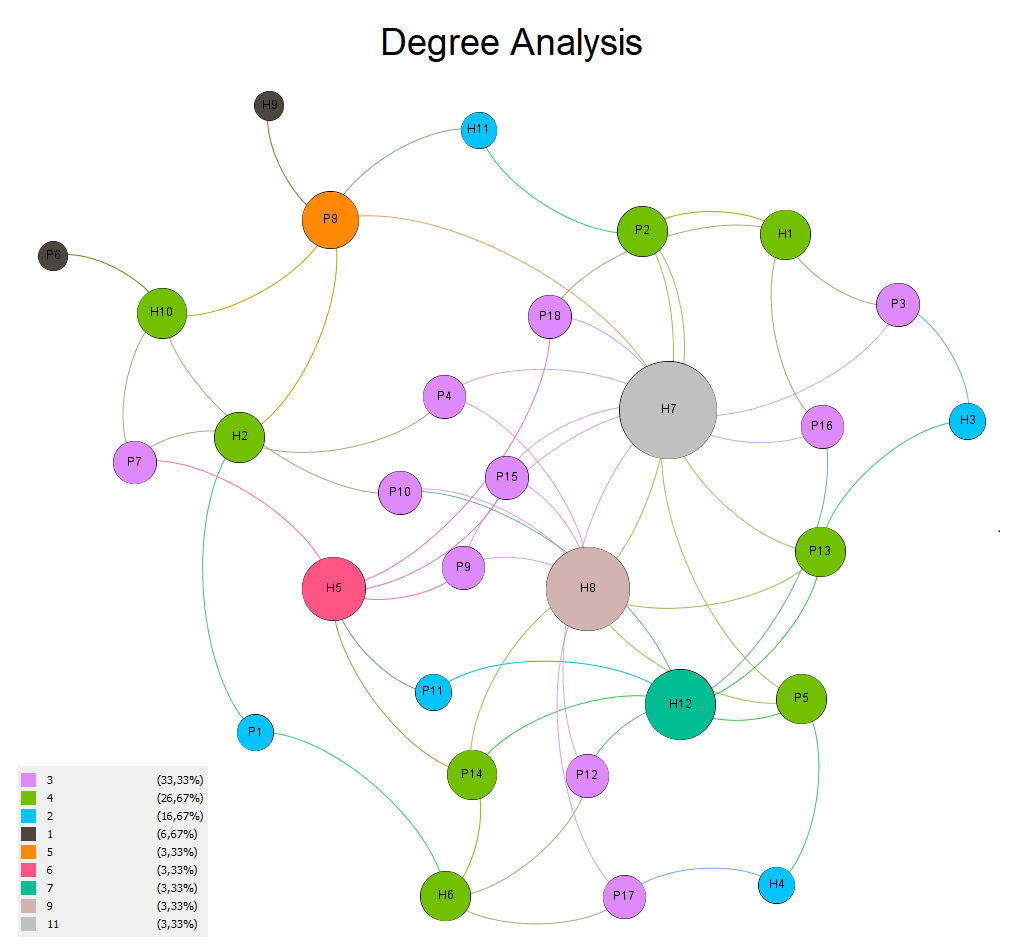



## Network 2: First projection network

### Knowing the Data

In [13]:
first_projection_network = netx.projected_graph(bipartite_network, graph['Unnamed: 0'])
print("Number of nodes:", len(first_projection_network.nodes))
print("Nodes",first_projection_network.nodes)
print("Number of edges:", len(first_projection_network.edges))
print("Edges",first_projection_network.edges)

Number of nodes: 18
Nodes ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18']
Number of edges: 109
Edges [('P1', 'P14'), ('P1', 'P8'), ('P1', 'P17'), ('P1', 'P7'), ('P1', 'P12'), ('P1', 'P4'), ('P2', 'P9'), ('P2', 'P14'), ('P2', 'P8'), ('P2', 'P17'), ('P2', 'P3'), ('P2', 'P5'), ('P2', 'P10'), ('P2', 'P16'), ('P2', 'P12'), ('P2', 'P18'), ('P2', 'P13'), ('P2', 'P4'), ('P2', 'P15'), ('P3', 'P9'), ('P3', 'P8'), ('P3', 'P5'), ('P3', 'P16'), ('P3', 'P12'), ('P3', 'P18'), ('P3', 'P13'), ('P3', 'P4'), ('P3', 'P15'), ('P4', 'P9'), ('P4', 'P14'), ('P4', 'P8'), ('P4', 'P17'), ('P4', 'P5'), ('P4', 'P10'), ('P4', 'P16'), ('P4', 'P7'), ('P4', 'P12'), ('P4', 'P18'), ('P4', 'P13'), ('P4', 'P15'), ('P5', 'P11'), ('P5', 'P9'), ('P5', 'P14'), ('P5', 'P17'), ('P5', 'P8'), ('P5', 'P10'), ('P5', 'P16'), ('P5', 'P12'), ('P5', 'P18'), ('P5', 'P13'), ('P5', 'P15'), ('P6', 'P10'), ('P6', 'P8'), ('P6', 'P7'), ('P7', 'P9'), ('P7', 'P14'), ('P7', 'P

### Average Degree and Degree Distribution

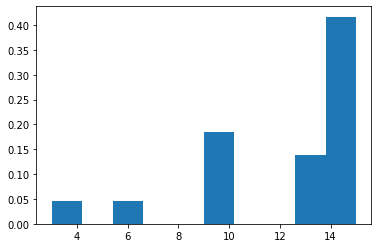

Degrees: dict_values([6, 13, 10, 15, 14, 3, 10, 14, 15, 14, 10, 15, 14, 14, 15, 13, 10, 13])
Average degree: 12.11111111111111
Each person shares the same hobbies with ~ 12 people


In [14]:
# colocar titulo no gráfico
print("Degrees:", calculate_degree_distribution(first_projection_network))
print("Average degree:", calculate_average_degree(first_projection_network))
print("Each person shares the same hobbies with ~ 12 people")

#### Degree Distribution Gephi

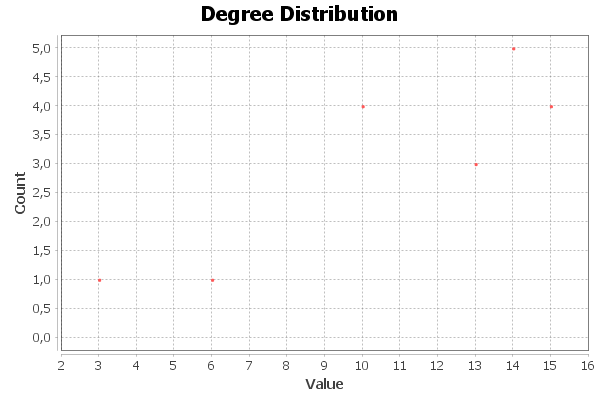

### Connected Components

In [15]:
# finding connected components
connected_components_first_projection = sorted(netx.connected_components(first_projection_network), key=len, reverse=True)
print("Number of connected components:", len(list(connected_components_first_projection)))
print("Connected components:",connected_components_first_projection)

Number of connected components: 1
Connected components: [{'P11', 'P14', 'P9', 'P2', 'P8', 'P17', 'P3', 'P5', 'P10', 'P16', 'P7', 'P12', 'P18', 'P6', 'P1', 'P13', 'P4', 'P15'}]


### Average Distance

In [16]:
# finding average distance
print("Average distance", netx.average_shortest_path_length(first_projection_network))

Average distance 1.2875816993464053


### Clustering Coefficient

In [17]:
# finding clustering coefficient
print("Clustering coefficient", netx.clustering(first_projection_network))
# precisa calcular outros clusterings

Clustering coefficient {'P1': 0.7333333333333333, 'P2': 0.8974358974358975, 'P3': 1.0, 'P4': 0.7714285714285715, 'P5': 0.8571428571428571, 'P6': 1.0, 'P7': 0.6444444444444445, 'P8': 0.6923076923076923, 'P9': 0.8095238095238095, 'P10': 0.7362637362637363, 'P11': 0.8888888888888888, 'P12': 0.780952380952381, 'P13': 0.8571428571428571, 'P14': 0.7692307692307693, 'P15': 0.8095238095238095, 'P16': 0.8974358974358975, 'P17': 0.8666666666666667, 'P18': 0.8461538461538461}


### Extra Parameter

In [32]:
# one extra parameter of choice
print("Is the graph planar?", netx.check_planarity(first_projection_network))
print("Degree centrality of each node", netx.degree_centrality(first_projection_network))

Is the graph planar? (False, None)
Degree centrality of each node {'P1': 0.3529411764705882, 'P2': 0.7647058823529411, 'P3': 0.5882352941176471, 'P4': 0.8823529411764706, 'P5': 0.8235294117647058, 'P6': 0.1764705882352941, 'P7': 0.5882352941176471, 'P8': 0.8235294117647058, 'P9': 0.8823529411764706, 'P10': 0.8235294117647058, 'P11': 0.5882352941176471, 'P12': 0.8823529411764706, 'P13': 0.8235294117647058, 'P14': 0.8235294117647058, 'P15': 0.8823529411764706, 'P16': 0.7647058823529411, 'P17': 0.5882352941176471, 'P18': 0.7647058823529411}


### Visualization of the network by degree value

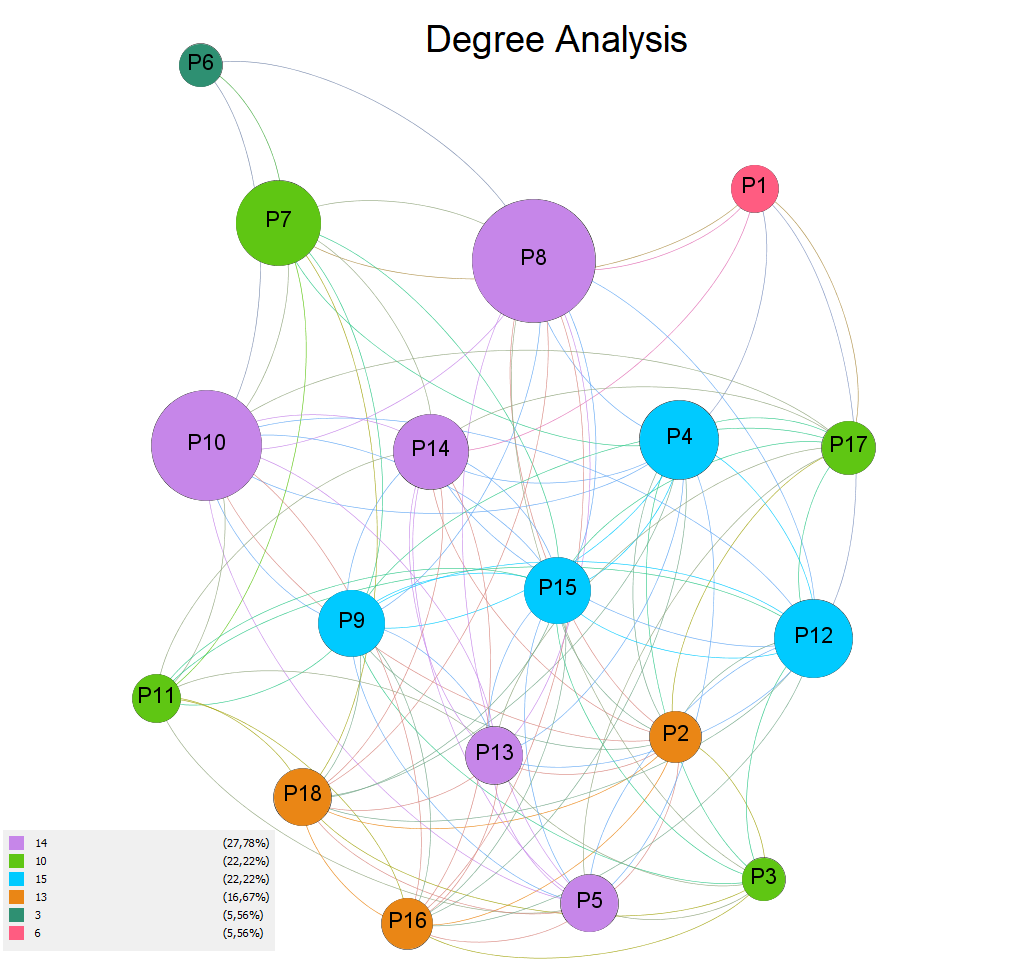

## Network 3: Second projection network

### Knowing the Data

In [19]:
second_projection_network = netx.projected_graph(bipartite_network, graph.columns[1:])
print(second_projection_network.nodes)
print(second_projection_network.edges)

['H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'H10', 'H11', 'H12']
[('H1', 'H7'), ('H1', 'H3'), ('H1', 'H12'), ('H1', 'H8'), ('H1', 'H5'), ('H1', 'H11'), ('H2', 'H6'), ('H2', 'H9'), ('H2', 'H7'), ('H2', 'H8'), ('H2', 'H5'), ('H2', 'H11'), ('H2', 'H10'), ('H3', 'H8'), ('H3', 'H12'), ('H3', 'H7'), ('H4', 'H8'), ('H4', 'H6'), ('H4', 'H12'), ('H4', 'H7'), ('H5', 'H6'), ('H5', 'H7'), ('H5', 'H12'), ('H5', 'H8'), ('H5', 'H10'), ('H6', 'H8'), ('H6', 'H7'), ('H6', 'H12'), ('H7', 'H9'), ('H7', 'H12'), ('H7', 'H8'), ('H7', 'H11'), ('H7', 'H10'), ('H8', 'H12'), ('H8', 'H11'), ('H8', 'H10'), ('H9', 'H10'), ('H9', 'H11'), ('H10', 'H12'), ('H10', 'H11')]


### Average Degree and Degree Distribution

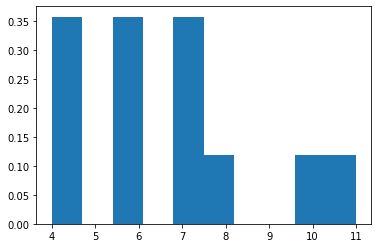

Degrees: dict_values([6, 7, 4, 4, 7, 6, 11, 10, 4, 7, 6, 8])
Average degree: 6.666666666666667
Each hobbie is shared with the same people with ~ 6 hobbies


In [20]:
# colocar titulo no gráfico
print("Degrees:", calculate_degree_distribution(second_projection_network))
print("Average degree:", calculate_average_degree(second_projection_network))
print("Each hobbie is shared with the same people with ~ 6 hobbies")

#### Degree Distribution Gephi

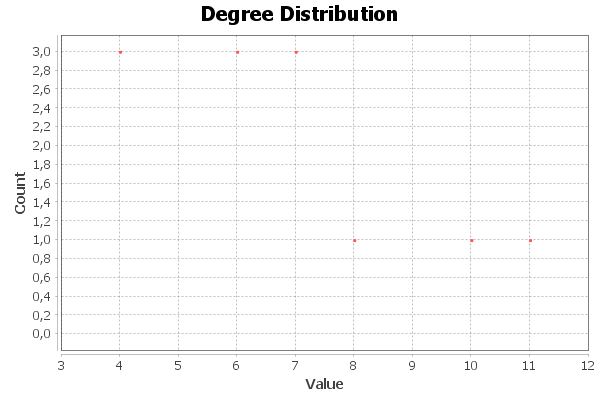

### Connected Components

In [21]:
# finding connected components
connected_components_second_projection = sorted(netx.connected_components(second_projection_network), key=len, reverse=True)
print("Number of connected components:", len(list(connected_components_second_projection)))
print("Connected components:",connected_components_second_projection)

Number of connected components: 1
Connected components: [{'H6', 'H4', 'H9', 'H2', 'H7', 'H3', 'H12', 'H8', 'H5', 'H11', 'H1', 'H10'}]


### Average Distance

In [22]:
# finding average distance
print("Average distance", netx.average_shortest_path_length(second_projection_network))

Average distance 1.393939393939394


### Clustering Coefficient

In [23]:
# finding clustering coefficient
print("Clustering coefficient", netx.clustering(second_projection_network))
# precisa calcular outros clusterings

Clustering coefficient {'H1': 0.7333333333333333, 'H2': 0.7142857142857143, 'H3': 1.0, 'H4': 1.0, 'H5': 0.7619047619047619, 'H6': 0.8, 'H7': 0.5272727272727272, 'H8': 0.5777777777777777, 'H9': 1.0, 'H10': 0.7142857142857143, 'H11': 0.7333333333333333, 'H12': 0.6428571428571429}


### Extra Parameter

In [31]:
# one extra parameter of choice
print("Is the graph planar?", netx.check_planarity(second_projection_network))
print("Degree centrality of each node", netx.degree_centrality(second_projection_network))

Is the graph planar? (False, None)
S-metric {'H1': 0.5454545454545454, 'H2': 0.6363636363636364, 'H3': 0.36363636363636365, 'H4': 0.36363636363636365, 'H5': 0.6363636363636364, 'H6': 0.5454545454545454, 'H7': 1.0, 'H8': 0.9090909090909092, 'H9': 0.36363636363636365, 'H10': 0.6363636363636364, 'H11': 0.5454545454545454, 'H12': 0.7272727272727273}


### Visualization of the network by degree value

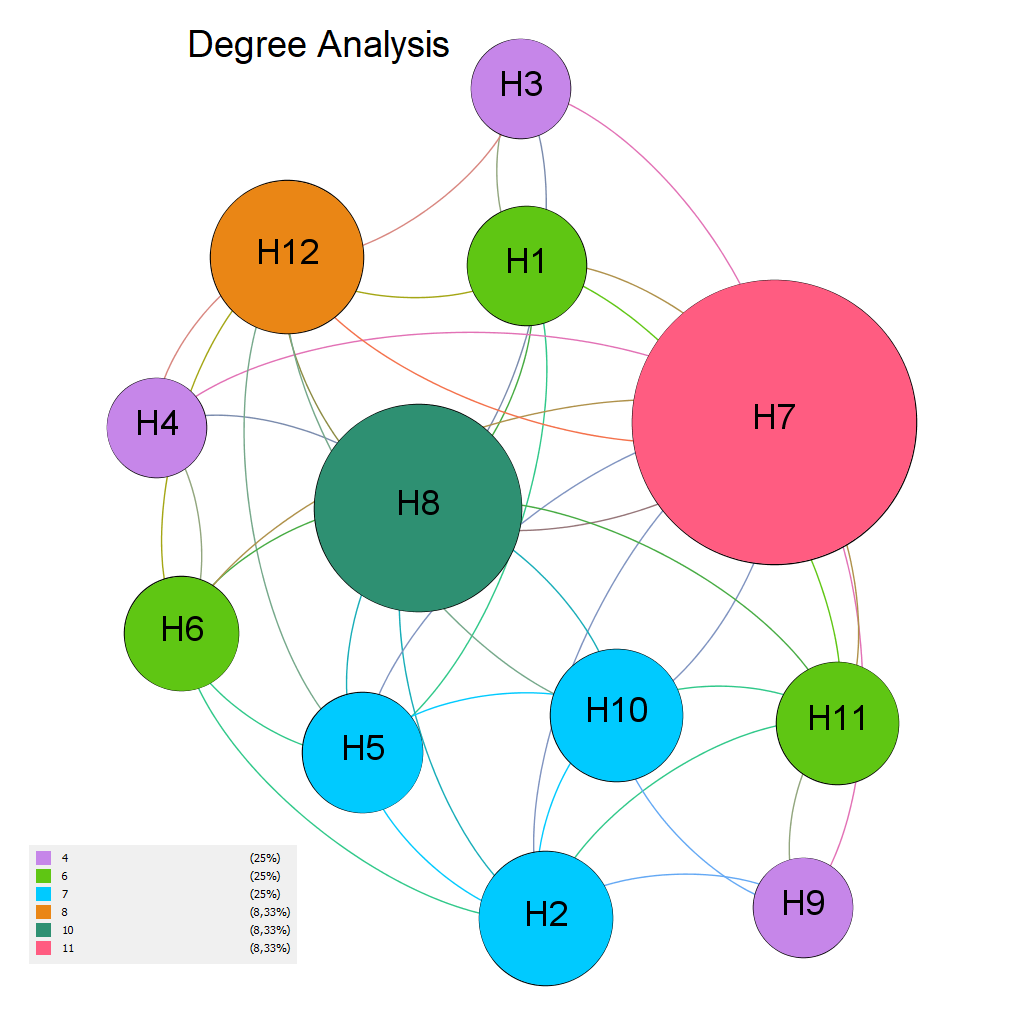

## Gephi

In [34]:
# exporting to a format that gephi understands
netx.write_gexf(bipartite_network, "bipartite_network.gexf")
netx.write_gexf(first_projection_network, "first_projection_network.gexf")
netx.write_gexf(second_projection_network, "second_projection_network.gexf")